# 📋 **Exploration et Préparation des Données Clients**

## 🎯 Objectif :
Préparer un jeu de données d’avis clients pour analyser la satisfaction et alimenter des modèles de Machine Learning.  
Cette phase comprend : l'exploration, le nettoyage, le traitement des textes, l'encodage des variables, et la création de variables utiles.

---

## 🗂️ **Plan du Notebook**

### I. 📥 Chargement et Exploration Initiale
1. [Chargement du Dataset](#1-chargement-du-dataset)
2. [Aperçu des Données et Valeurs Manquantes](#2-apercu-et-informations-generales)

### II. 🧠 Compréhension des Données
3. [Description des Variables](#4-description-des-variables)
4. [Statistiques Descriptives et Visualisations](#5-statistiques-descriptives-et-visualisations)

### III. 🧹 Prétraitement des Données
5. [Traitement des variables `date`, `maj`, `date_commande` ](#6-traitement-de-la-variable-date)
6. [Suppression de la Variable `client`](#7-suppression-de-la-variable-client)
7. [Analyse de la Variable Cible `star`](#8-analyse-de-la-variable-cible-star)

### IV. 🔢  Encodage des Variables Catégorielles
8. [Encodage de `company`,`source`  (`OneHotEncoder`)](#9-encodage-de-company)
9. [Encodage par Fréquence (`ville`)](#10-encodage-par-frequence)

### V. 🔍 Traitement des Commentaires Textuels
10. [Nettoyage des Commentaires (`Commentaire`)](#11-nettoyage-des-commentaires)
11. [Analyse des Mots les Plus Fréquents](#12-analyse-des-mots-les-plus-frequents)

### VI. 🧩 Gestion des Valeurs Manquantes
12. [Suppression des Commentaires Manquants et de la colonne `reponse`](#16-suppression-des-commentaires-manquants)

### VII. ✅ Vérification et Nettoyage Final
13. [Vérification des Types et Doublons](#17-verification-des-types-et-doublons)
14. [Aperçu Final du Dataset](#18-apercu-final-du-dataset)

### VIII. 💾 Sauvegarde du Dataset Nettoyé
15. [Export du Fichier Nettoyé](#19-export-du-fichier-nettoye)

---

🔜 **Étape suivante :** Modélisation 

# I. 📥  Chargement et Exploration Initiale

## 1. Chargement du Dataset <a name="1-chargement-du-dataset"></a>
Nous commençons par importer les bibliothèques nécessaires ainsi que le fichier CSV dans un DataFrame pandas pour analyser les données.

In [1]:
# Importation des bibliothèques nécessaires pour l'analyse et le traitement des données
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string

# Chargement du fichier 'reviews_trust.csv' dans un DataFrame
df = pd.read_csv('reviews_trust.csv', encoding='utf-8') # On précise l'encodage utf-8 pour éviter les problèmes de caractères spéciaux

# Affichage des 10 premières lignes du dataset pour avoir un aperçu des données
df.head(10)

,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
5,"Commande passée pour une vente Lacoste , livra...",1,2021-06-19 00:00:00+00:00,Cyril CARABOT,"Bonjour Cyril , Je fais suite à votre message ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
6,Annulation de commande après 2 mois d ’ attent...,1,2021-06-18 00:00:00+00:00,aurore regnier,"Bonjour Aurore , Je suis sincèrement désolé d'...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
7,Extrêmement déçue de la vente Apple ! ! Achat ...,1,2021-06-18 00:00:00+00:00,Paola Perez,"Bonjour Paola , Je fais suite à votre message ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
8,Extrêmement deçu pour mes achats lors la vente...,1,2021-06-18 00:00:00+00:00,Ayna,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
9,S'il y'avait une option : ne pas mettre d'étoi...,1,2021-06-18 00:00:00+00:00,linda Ng,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN


## 2. Aperçu des Données et Valeurs Manquantes <a name="2-apercu-et-informations-generales"></a>

Dans cette étape, nous allons vérifier les types des variables et le nombre de valeurs manquantes dans chaque colonne pour comprendre la structure du dataset.

In [2]:
# Affichage de la taille du DataFrame : nombre de lignes et colonnes
print(f'\n=== Taille du DataFrame ===\nNombre de lignes : {df.shape[0]}, Nombre de colonnes : {df.shape[1]}\n')

# Affichage des informations générales sur le DataFrame (colonnes, types de données, valeurs manquantes)
print('\n=== Informations générales sur le DataFrame ===\n')
df.info()

# Statistiques descriptives sur les colonnes numériques
print('\n=== Statistiques descriptives ===\n')
print(df.describe())

# Affichage des valeurs manquantes par colonne
print('\n=== Valeurs manquantes par colonne ===\n')
print(df.isnull().sum())


=== Taille du DataFrame ===
Nombre de lignes : 19863, Nombre de colonnes : 11


=== Informations générales sur le DataFrame ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Commentaire    19834 non-null  object 
 1   star           19863 non-null  int64  
 2   date           19488 non-null  object 
 3   client         10215 non-null  object 
 4   reponse        8477 non-null   object 
 5   source         19863 non-null  object 
 6   company        19863 non-null  object 
 7   ville          4860 non-null   object 
 8   maj            5 non-null      object 
 9   date_commande  6686 non-null   object 
 10  ecart          6686 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB

=== Statistiques descriptives ===

               star        ecart
count  19863.000000  6686.000000
mean       3.408398    14


# Analyse initiale du dataset

- Le dataset comprend **19 863 avis** et **11 colonnes** principales.  
- La colonne **`star`** (note client) est complète, avec une moyenne de **3,4 sur 5**.  
- La colonne **`date`** présente **375 valeurs manquantes**, ce qui reste faible par rapport à d’autres variables comme **`client`** ou **`ville`**, très incomplètes.  
- Certaines colonnes comme **`maj`**, **`date_commande`** et **`ecart`** contiennent un grand nombre de données manquantes, ce qui nécessitera un traitement adapté en fonction de leur pertinence.  



# II. 🧠 Compréhension des Données

## 3. Description des Variables <a name="4-description-des-variables"></a>

### Variable cible (y)

| **Nom**    | **Description**                                         |
|------------|---------------------------------------------------------|
| `star`     | Note de satisfaction du client (1 à 5), utile pour mesurer et prédire le taux de satisfaction. |

### Variables explicatives (X)

| **Nom**          | **Description**                                                                 |
|------------------|---------------------------------------------------------------------------------|
| `Commentaire`    | Texte libre de l’avis, reflète le ressenti du client.                           |
| `réponse`        | Réponse de l’entreprise au commentaire.                                         |
| `company`        | Nom de l’entreprise concernée (Veepee ou ShowRoom).                             |
| `source`         | Plateforme de dépôt de l’avis (Trustpilot).                                     |
| `ville`          | Ville renseignée par le client.                                                 |
| `ecart`          | Délai entre commande et avis, possible indicateur d’insatisfaction.             |
| `date_commande`  | Date à laquelle la commande a été passée.                                       |
| `date`           | Date de publication de l’avis.                                                  |
| `maj`            | Date de mise à jour éventuelle de l’avis.                                        |
| `client`         | Identifiant ou nom du client.                |

## 4. Statistiques Descriptives et Visualisations <a name="5-statistiques-descriptives-et-visualisations"></a>


Distribution des notes (proportions) :
star
1    0.257866
2    0.065901
3    0.087952
4    0.186528
5    0.401752
Name: proportion, dtype: float64


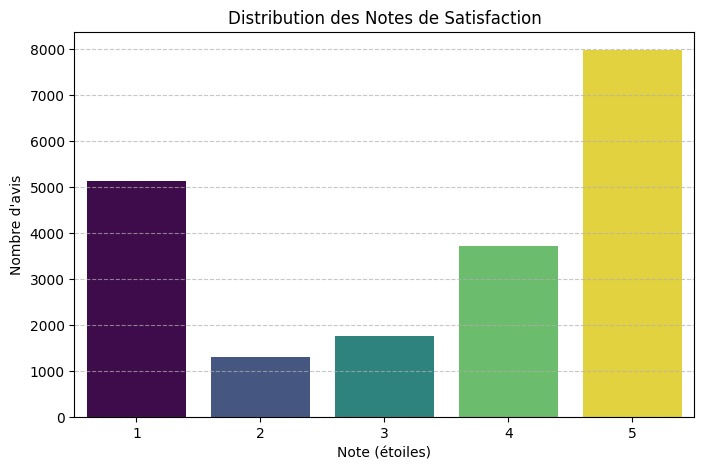

In [3]:
# Affichage de la distribution relative des notes (en proportions)
print("\nDistribution des notes (proportions) :")
print(df['star'].value_counts(normalize=True).sort_index())

# Visualisation de la distribution des notes avec un countplot seaborn
plt.figure(figsize=(8,5))
sns.countplot(x='star', data=df, hue='star', palette='viridis', legend=False)
plt.title("Distribution des Notes de Satisfaction")
plt.xlabel("Note (étoiles)")
plt.ylabel("Nombre d'avis")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- **40 %** des clients ont donné la **note maximale de 5 étoiles**, indiquant une **forte satisfaction**.

- **26 %** des clients ont attribué la **note minimale de 1 étoile**, révélant un **taux notable d’insatisfaction**.

- Cette répartition montre une **différence importante dans la perception de la qualité du service ou produit**.

# III. 🧹 Prétraitement des Données¶

## 5. Traitement des Variable temporelles: `date`, `maj`, `date_commande` <a name="6-traitement-de-la-variable-date"></a>

Dans cette étape, nous allons :

- Convertir les variables `date`, `maj` et `date_commande` en format datetime.
- Extraire de nouvelles variables temporelles dérivées : mois, jour, week-end, etc.
- Etudier la corrélation de ces variables avec la variable cible `star` afin d'évaluer leur pertinence.
- Supprimer les variables temporelles jugées non pertinentes en raison de fortes valeurs manquantes ou corrélations faibles. 

In [4]:
print(df.columns)

Index(['Commentaire', 'star', 'date', 'client', 'reponse', 'source', 'company',
       'ville', 'maj', 'date_commande', 'ecart'],
      dtype='object')


Corrélation avec la variable cible 'star' :
star                1.000000
commande_weekend    0.169395
commande_day        0.012637
date_day            0.000967
maj_weekend        -0.001756
commande_weekday   -0.013084
commande_month     -0.014704
date_weekday       -0.015733
date_month         -0.045304
date_weekend       -0.305039
maj_month          -0.480384
maj_day            -0.645301
maj_weekday        -0.838557
date_hour                NaN
commande_hour            NaN
maj_hour                 NaN
Name: star, dtype: float64


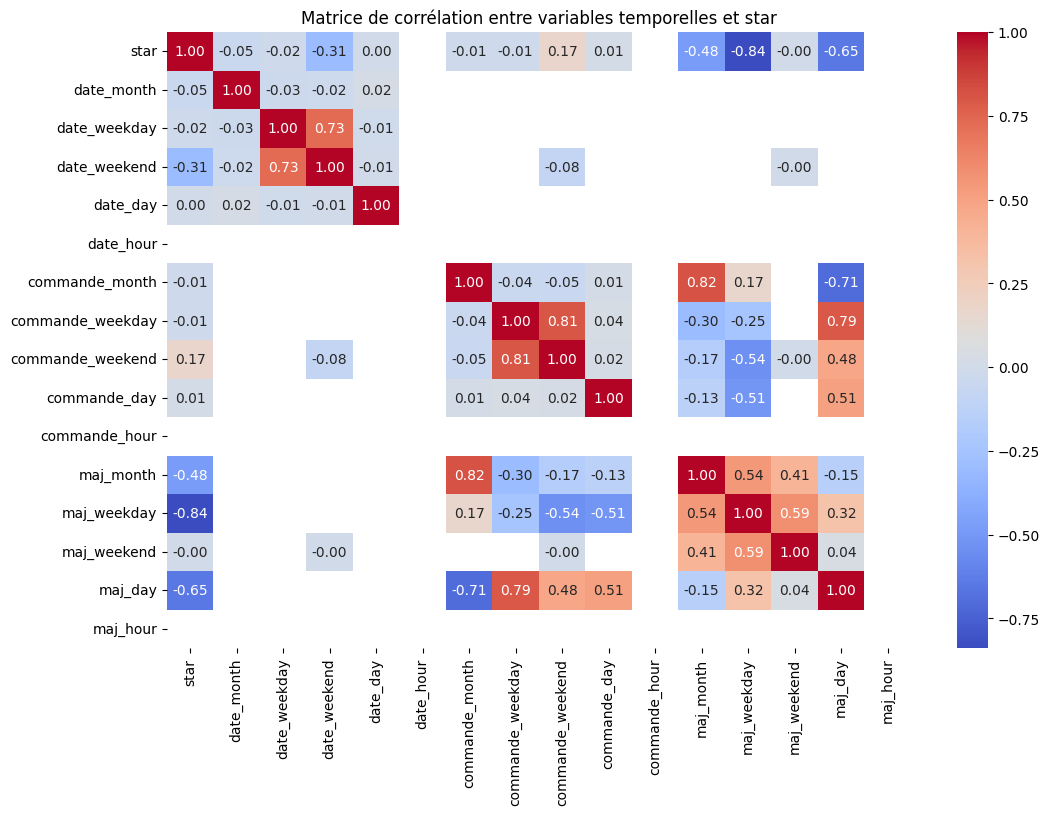

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date_hour      5360 non-null   float64
 1   commande_hour  6686 non-null   float64
 2   maj_hour       5 non-null      float64
dtypes: float64(3)
memory usage: 465.7 KB
None
   date_hour  commande_hour  maj_hour
0        0.0            NaN       NaN
1        0.0            NaN       NaN
2        0.0            NaN       NaN
3        0.0            NaN       NaN
4        0.0            NaN       NaN


In [5]:
# Conversion en datetime avec gestion des erreurs
for col in ['date', 'maj', 'date_commande']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Extraction variables temporelles pour 'date'
df['date_month'] = df['date'].dt.month
df['date_weekday'] = df['date'].dt.weekday
df['date_weekend'] = np.where(df['date_weekday'].isin([5,6]), 1, 0)
df['date_day'] = df['date'].dt.day
df['date_hour'] = df['date'].dt.hour

# Extraction variables temporelles pour 'maj'
df['maj_month'] = df['maj'].dt.month
df['maj_weekday'] = df['maj'].dt.weekday
df['maj_weekend'] = np.where(df['maj_weekday'].isin([5,6]), 1, 0)
df['maj_day'] = df['maj'].dt.day
df['maj_hour'] = df['maj'].dt.hour

# Extraction variables temporelles pour 'date_commande'
df['commande_month'] = df['date_commande'].dt.month
df['commande_weekday'] = df['date_commande'].dt.weekday
df['commande_weekend'] = np.where(df['commande_weekday'].isin([5,6]), 1, 0)
df['commande_day'] = df['date_commande'].dt.day
df['commande_hour'] = df['date_commande'].dt.hour

# Colonnes à inclure dans l’étude de corrélation
cols_corr = [
    'star',
    'date_month', 'date_weekday', 'date_weekend', 'date_day', 'date_hour',
    'commande_month', 'commande_weekday', 'commande_weekend', 'commande_day', 'commande_hour',
    'maj_month', 'maj_weekday', 'maj_weekend', 'maj_day', 'maj_hour'
]

# Calcul de la corrélation 
corr_matrix = df[cols_corr].corr()

print("Corrélation avec la variable cible 'star' :")
print(corr_matrix['star'].sort_values(ascending=False))

# Visualisation heatmap de la corrélation
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matrice de corrélation entre variables temporelles et star')
plt.show()

# Analyse des valeurs manquantes sur les variables heure
print(df[['date_hour', 'commande_hour', 'maj_hour']].info())
print(df[['date_hour', 'commande_hour', 'maj_hour']].head())

### Analyse des variables temporelles

- Plusieurs variables temporelles présentent beaucoup de valeurs manquantes, notamment celles liées à `date` et `maj`.
- La plupart ont une très faible corrélation avec la cible `star`.
- Seule la variable `commande_weekend` montre une corrélation positive modérée.
- Les variables horaires (`date_hour`, `commande_hour`, `maj_hour`) sont trop incomplètes pour être utiles.

### Conclusion

Nous supprimons toutes les variables temporelles très incomplètes ou faiblement corrélées, sauf `commande_weekend` que nous conservons pour sa pertinence.  
Cela simplifie le jeu de données tout en gardant les informations temporelles utiles.


In [6]:
# Liste des colonnes à supprimer
cols_to_drop = [
    'date', 'maj',
    'date_month', 'date_weekday', 'date_weekend', 'date_day', 'date_hour',
    'maj_month', 'maj_weekday', 'maj_weekend', 'maj_day', 'maj_hour', 'month', 'weekday', 'day', 'hour', 'commande_month', 'commande_weekday', 'commande_day', 'commande_hour', 'date_commande', 'ecart'
]

# Supprimer les colonnes si elles existent dans le dataframe
cols_present = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=cols_present, inplace=True)

print(f"Colonnes supprimées : {cols_present}")
print(f"Colonnes restantes : {df.columns.tolist()}")

Colonnes supprimées : ['date', 'maj', 'date_month', 'date_weekday', 'date_weekend', 'date_day', 'date_hour', 'maj_month', 'maj_weekday', 'maj_weekend', 'maj_day', 'maj_hour', 'commande_month', 'commande_weekday', 'commande_day', 'commande_hour', 'date_commande', 'ecart']
Colonnes restantes : ['Commentaire', 'star', 'client', 'reponse', 'source', 'company', 'ville', 'commande_weekend']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Commentaire       19834 non-null  object
 1   star              19863 non-null  int64 
 2   client            10215 non-null  object
 3   reponse           8477 non-null   object
 4   source            19863 non-null  object
 5   company           19863 non-null  object
 6   ville             4860 non-null   object
 7   commande_weekend  19863 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.2+ MB


## 6. Suppression de la Variable `client` <a name="7-suppression-de-la-variable-client"></a>

La variable client contient souvent des informations uniques ou des identifiants qui n’apportent pas de valeur à l’analyse globale. Pour simplifier notre jeu de données, nous allons donc la supprimer.

In [8]:
# Affichage avant suppression de la variable 'client'
print("Colonnes avant suppression :")
print(df.columns)

# Suppression de la variable 'client'
df.drop('client', axis=1, inplace=True)

# Affichage après suppression de la variable 'client'
print("Colonnes après suppression :")
print(df.columns)

Colonnes avant suppression :
Index(['Commentaire', 'star', 'client', 'reponse', 'source', 'company',
       'ville', 'commande_weekend'],
      dtype='object')
Colonnes après suppression :
Index(['Commentaire', 'star', 'reponse', 'source', 'company', 'ville',
       'commande_weekend'],
      dtype='object')


## 7. Analyse de la Variable Cible `star` <a name="8-analyse-de-la-variable-cible-star"></a>

La variable star représente la note de satisfaction du client sur une échelle de 1 à 5. Nous allons :

- Vérifier sa distribution.

- Visualiser la répartition des valeurs.


Répartition des notes (en %):
star
1    0.257866
2    0.065901
3    0.087952
4    0.186528
5    0.401752
Name: proportion, dtype: float64


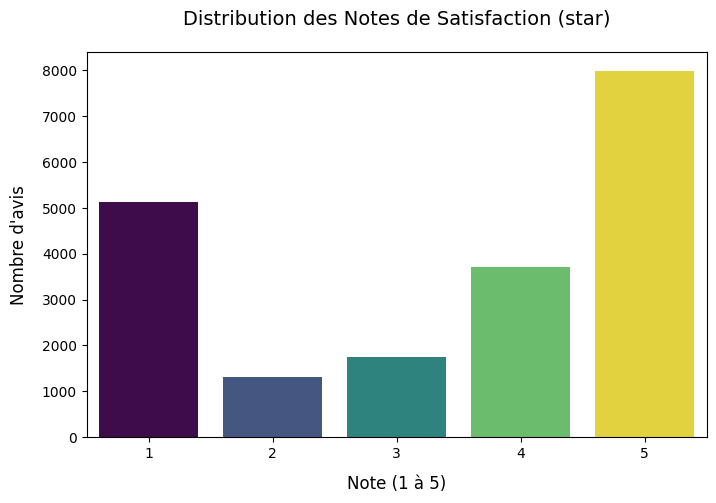


Répartition des notes par entreprise (en proportions) :
star             1         2         3         4         5
company                                                   
ShowRoom  0.159246  0.064495  0.099507  0.213696  0.463057
VeePee    0.803618  0.073684  0.024013  0.036184  0.062500


<Figure size 1200x700 with 0 Axes>

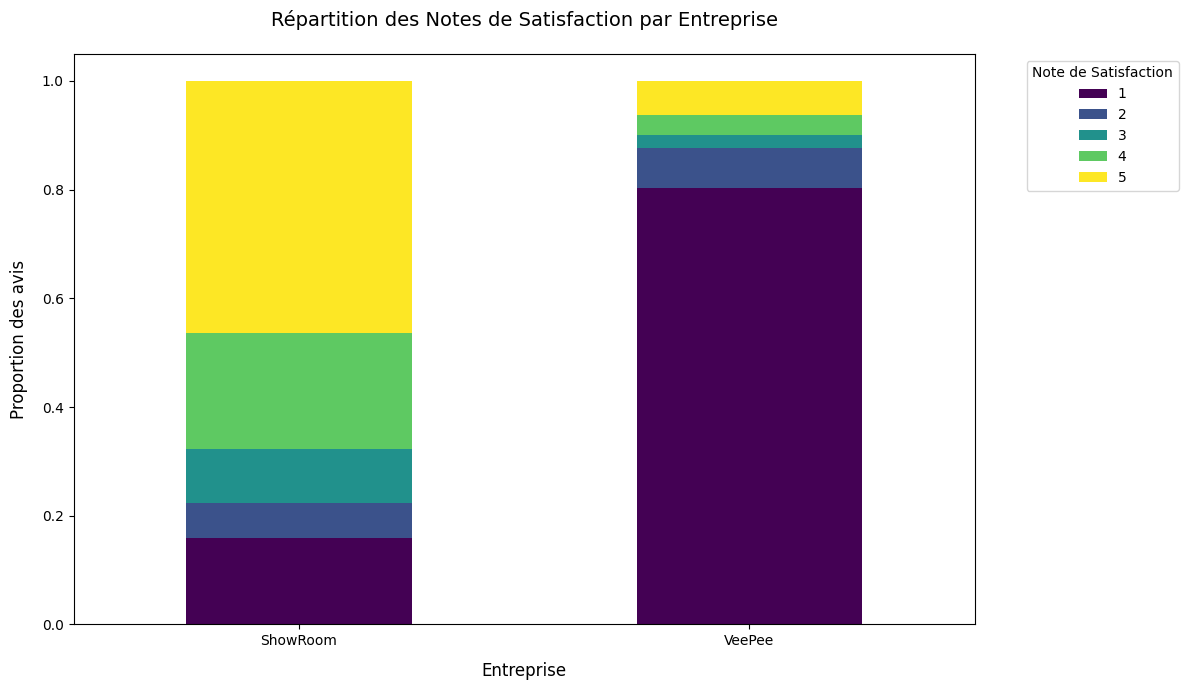

In [9]:
# Répartition des notes (en %):
print("\n" + "="*50)
print("Répartition des notes (en %):")
print("="*50)
star_distribution = df['star'].value_counts(normalize=True).sort_index()
print(star_distribution)

# Visualisation simple de la distribution des notes
plt.figure(figsize=(8, 5))
sns.countplot(x='star', data=df, hue='star', palette='viridis', legend=False)
plt.title("Distribution des Notes de Satisfaction (star)", fontsize=14, pad=20)
plt.xlabel("Note (1 à 5)", fontsize=12, labelpad=10)
plt.ylabel("Nombre d'avis", fontsize=12, labelpad=10)
plt.show()

print("\n" + "="*50)
print("Répartition des notes par entreprise (en proportions) :")
print("="*50)
star_distribution_by_company = df.groupby('company')['star'].value_counts(normalize=True).unstack().fillna(0)
print(star_distribution_by_company)

# Visualisation empilée de la répartition des notes par entreprise
plt.figure(figsize=(12, 7))
star_distribution_by_company.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    figsize=(12, 7),
    legend=True
)
plt.title("Répartition des Notes de Satisfaction par Entreprise", fontsize=14, pad=20)
plt.xlabel("Entreprise", fontsize=12, labelpad=10)
plt.ylabel("Proportion des avis", fontsize=12, labelpad=10)
plt.legend(title="Note de Satisfaction", labels=[1, 2, 3, 4, 5], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Interprétation des résultats :

- Les résultats montrent que la majorité des clients (environ 40%) sont très satisfaits (note 5), tandis qu'une proportion significative est aussi insatisfaite (note 1, environ 25%).

- ShowRoom présente une répartition plus équilibrée des notes, avec une proportion importante de clients très satisfaits (note 5) et peu d'insatisfaction (note 1), indiquant une expérience client positive. En revanche, VeePee affiche une répartition déséquilibrée, majoritairement composée de notes 1, suggérant des problèmes importants et un fort mécontentement client.

- Ces résultats montrent que ShowRoom bénéficie d'une meilleure réputation auprès de ses clients, tandis que VeePee devrait se concentrer sur l'amélioration de son service pour répondre à la forte insatisfaction de ses utilisateurs.

# IV. 🔢  Encodage des Variables Catégorielles

Les variables catégorielles dans notre jeu de données sont :

- company

- source

- ville

Nous allons utiliser One-Hot Encoder pour les variables avec un nombre limité de modalités (company et source), et l'encodage par fréquence pour ville.

- `company` et `source` ont un nombre limité de catégories, alors nous décidons d'appliquer un encodage label simple.

- `ville` contient de nombreuses modalités, un encodage par fréquence est plus adapté pour gérer cette grande diversité efficacement.


## 8. Encodage de `company` et `source` (`OneHotEncoder`) <a name="9-encodage-de-company"></a>

In [10]:
# Encodage One-Hot pour les variables 'company' et 'source'
df = pd.get_dummies(df, columns=['company', 'source'], prefix=['company', 'source'])

print("Encodage One-Hot terminé pour 'company', 'source'.")
print("Exemple de colonnes encodées pour 'company' :")
print(df.filter(like='company_').head())

print("\nExemple de colonnes encodées pour 'source' :")
print(df.filter(like='source_').head())

# Affichage du début du dataframe complet
print("\nAperçu du dataframe après encodage :")
display(print(df.head()))

# Sélection des colonnes one-hot
cols_to_convert = df.filter(regex='^(company_|source_)').columns

# Conversion des booléens en entiers (True/False → 1/0)
df[cols_to_convert] = df[cols_to_convert].astype(int)

Encodage One-Hot terminé pour 'company', 'source'.
Exemple de colonnes encodées pour 'company' :
   company_ShowRoom  company_VeePee
0              True           False
1              True           False
2              True           False
3              True           False
4              True           False

Exemple de colonnes encodées pour 'source' :
   source_TrustPilot  source_TrustedShop
0               True               False
1               True               False
2               True               False
3               True               False
4               True               False

Aperçu du dataframe après encodage :
                                         Commentaire  star  \
0  Bonjour , Ca doit faire 5 ans environ que je s...     1   
1  Vente lacoste article manquant photo prise sur...     1   
2  Vente Lacoste Honteuse , article erroné , arti...     1   
3  J'ai commandé des mules de la marque Moosefiel...     2   
4  Commande téléphone etat A+ . Livraison d un 

None

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Commentaire         19834 non-null  object
 1   star                19863 non-null  int64 
 2   reponse             8477 non-null   object
 3   ville               4860 non-null   object
 4   commande_weekend    19863 non-null  int64 
 5   company_ShowRoom    19863 non-null  int64 
 6   company_VeePee      19863 non-null  int64 
 7   source_TrustPilot   19863 non-null  int64 
 8   source_TrustedShop  19863 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.4+ MB


In [12]:
df.head()

,Commentaire,star,reponse,ville,commande_weekend,company_ShowRoom,company_VeePee,source_TrustPilot,source_TrustedShop
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,NaN,NaN,0,1,0,1,0
1,Vente lacoste article manquant photo prise sur...,1,NaN,NaN,0,1,0,1,0
2,"Vente Lacoste Honteuse , article erroné , arti...",1,NaN,NaN,0,1,0,1,0
3,J'ai commandé des mules de la marque Moosefiel...,2,"Bonjour , Je suis sincèrement navré d'apprendr...",NaN,0,1,0,1,0
4,Commande téléphone etat A+ . Livraison d un vi...,1,"Bonjour Julie , Je suis sincèrement désolé de ...",NaN,0,1,0,1,0


## 9. Encodage par Fréquence (`ville`) <a name="10-encodage-par-frequence"></a>

In [13]:
#Encodage par fréquence pour la variable 'ville'

for col in ['ville']:
    freq = df[col].value_counts(normalize=True)
    df[col + '_encoded'] = df[col].map(freq)

print("Encodage par fréquence terminé pour 'ville'.")

Encodage par fréquence terminé pour 'ville'.


In [14]:
# Matrice de corrélation avec la cible 'star'
corr_matrix = df[['star', 'source_TrustedShop', 'source_TrustPilot', 'company_ShowRoom', 'company_VeePee', 'commande_weekend', 'ville_encoded']].corr()
print(corr_matrix['star'].sort_values(ascending=False))


star                  1.000000
source_TrustedShop    0.736598
company_ShowRoom      0.496603
commande_weekend      0.169395
ville_encoded        -0.043874
company_VeePee       -0.496603
source_TrustPilot    -0.736598
Name: star, dtype: float64


### Analyse de 'ville_encoded':
- Corrélation très faible avec 'star' (-0.04)
- Données incomplètes: seulement 4860/19863 valeurs non nulles.
- Variable peu informative pour le modèle.

Nous décidons de supprimer cette variable.

In [15]:
df.drop(columns=['ville_encoded', 'ville'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Commentaire         19834 non-null  object
 1   star                19863 non-null  int64 
 2   reponse             8477 non-null   object
 3   commande_weekend    19863 non-null  int64 
 4   company_ShowRoom    19863 non-null  int64 
 5   company_VeePee      19863 non-null  int64 
 6   source_TrustPilot   19863 non-null  int64 
 7   source_TrustedShop  19863 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.2+ MB


# V. 🔍 Traitement des Commentaires Textuels

## 10. Nettoyage des Commentaires (`Commentaire`) <a name="11-nettoyage-des-commentaires"></a>

In [17]:
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud


# Liste de stopwords personnalisée
custom_stopwords = set(ENGLISH_STOP_WORDS).union({
    "d", "même", "cest", "de", "je", "ne", "la", "le", "les", "des", "et", "à", "du", "un", "une", "c'est", "pour", "sur", "avec", 
    "vous", "moi", "que", "comme", "mais", "a", "en", "dans", "si", "l", "il", "elle", "cela", "ça", "ce", 
    "suis", "été", "ont", "au", "aux", "plus", "est", "sont", "nous", "mon", "me", "ses", "tout", "aujourd'hui",
    "pas", "qui", "jai", "aussi", "beaucoup", "donc", "encore", "site", "commande", "colis", 
    "service", "livraison", "j", "ai", "ma", "par", "n", "ils", "enfin", "tres", "c", "qu", "m", "là", "peu", "t", "faire", "avis", "votre", "merci"
})

# Liste des apostrophes à nettoyer
apostrophes = ["’", "‘", "`", "´", "ʻ", "ʹ", "ʾ", "ʿ", "ˈ", "'"]

# Fonction de nettoyage simple sans lemmatisation
def clean_text_v5(text):
    if isinstance(text, str):
        # Minuscules
        text = text.lower()
        
        # Remplacer les apostrophes typographiques par espace
        for apos in apostrophes:
            text = text.replace(apos, " ")
        
        # Supprimer la ponctuation
        text = ''.join(char for char in text if char not in string.punctuation)
        
        # Supprimer les chiffres
        text = ''.join(char for char in text if not char.isdigit())
        
        # Supprimer les stopwords
        words = [word for word in text.split() if word not in custom_stopwords]
        
        return ' '.join(words)
    return ''

# Application du nettoyage
df['Commentaire_clean'] = df['Commentaire'].apply(clean_text_v5)

## 11. Analyse des mots les plus fréquents <a name="12-analyse-des-mots-les-plus-frequents"></a>

Les 10 mots les plus fréquents après nettoyage :
très: 5391
bien: 3523
client: 2552
reçu: 2320
vente: 2181
produit: 2160
rien: 2139
remboursement: 1986
qualité: 1964
mois: 1942


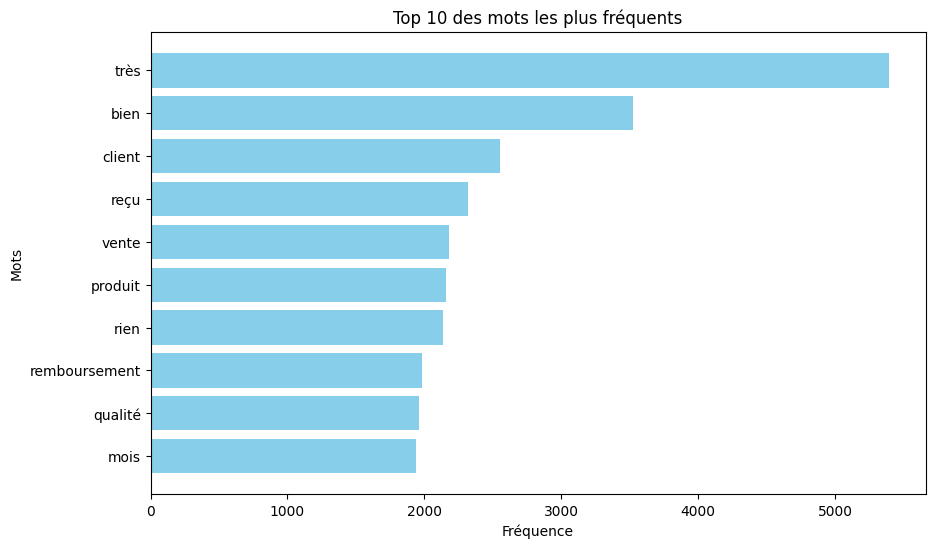

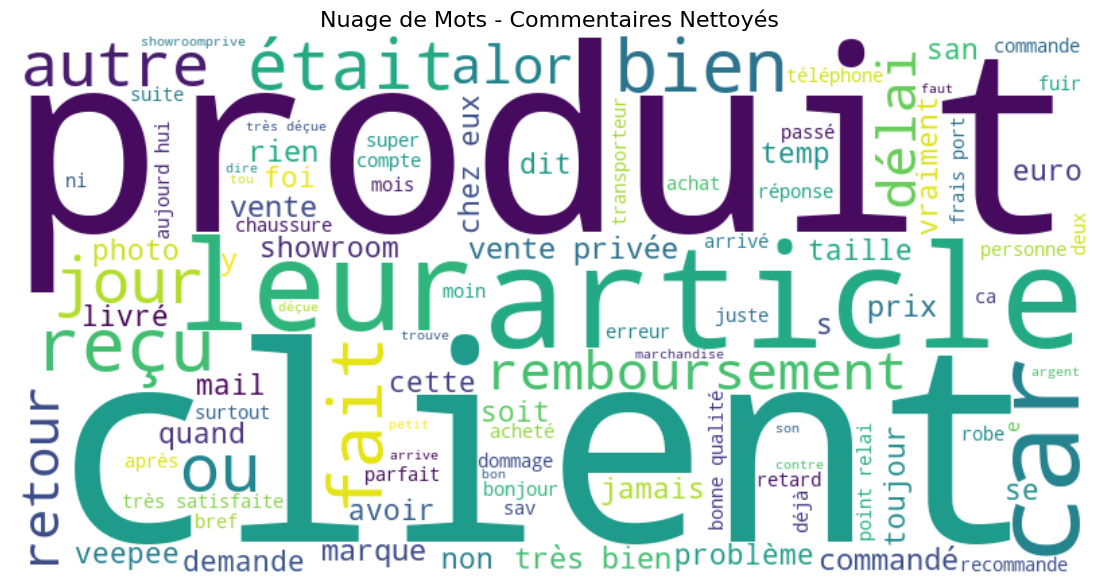

In [18]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Regrouper tous les mots nettoyés
all_words = ' '.join(df['Commentaire_clean']).split()

# Compter la fréquence des mots
word_counts = Counter(all_words)

# --- Affichage des 10 mots les plus fréquents ---
most_common_words = word_counts.most_common(10)

print("Les 10 mots les plus fréquents après nettoyage :")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Bar chart des 10 mots les plus fréquents
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel("Fréquence")
plt.ylabel("Mots")
plt.title("Top 10 des mots les plus fréquents")
plt.gca().invert_yaxis()
plt.show()

# --- Nuage de mots complet ---
text = ' '.join(all_words)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100,
    random_state=42
).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de Mots - Commentaires Nettoyés", fontsize=16)
plt.show()

Les clients parlent surtout de la qualité du service et des produits, avec une majorité de termes positifs, mais aussi quelques signes de frustration liés à la livraison ou au remboursement.

# VI. 🧩 Gestion des Valeurs Manquantes¶

Pour les variables restantes, nous allons supprimer les commantaires manquants ainsi que la colonne 'reponse'

In [19]:
# 1. Vérification initiale des valeurs manquantes (nombre et pourcentage)
print("Valeurs manquantes par colonne (nombre) :")
print(df.isnull().sum())
print("\nValeurs manquantes par colonne (pourcentage) :")
print(df.isnull().mean())

Valeurs manquantes par colonne (nombre) :
Commentaire              29
star                      0
reponse               11386
commande_weekend          0
company_ShowRoom          0
company_VeePee            0
source_TrustPilot         0
source_TrustedShop        0
Commentaire_clean         0
dtype: int64

Valeurs manquantes par colonne (pourcentage) :
Commentaire           0.001460
star                  0.000000
reponse               0.573227
commande_weekend      0.000000
company_ShowRoom      0.000000
company_VeePee        0.000000
source_TrustPilot     0.000000
source_TrustedShop    0.000000
Commentaire_clean     0.000000
dtype: float64


## 12. Suppression des Commentaires Manquants et de la colonne `reponse` <a name="16-suppression-des-commentaires-manquants"></a>

In [20]:
# 5. Suppression des lignes avec commentaires manquants 
df = df.loc[df['Commentaire'].notna()].copy()

# Suppression de la colonne 'reponse' (inutile pour la modélisation)
if 'reponse' in df.columns:
    df = df.drop(columns=['reponse'])

# 6. Vérification finale
print("Nombre de valeurs manquantes après traitement :")
print(df.isnull().sum())

# 7. Sauvegarde du DataFrame nettoyé
df.to_csv('reviews_trust_cleaned_imputed.csv', index=False)


Nombre de valeurs manquantes après traitement :
Commentaire           0
star                  0
commande_weekend      0
company_ShowRoom      0
company_VeePee        0
source_TrustPilot     0
source_TrustedShop    0
Commentaire_clean     0
dtype: int64


# VII. ✅ Vérification et Nettoyage Final

## 13. Vérification des Types et Doublons <a name="17-verification-des-types-et-doublons)"></a>

In [21]:
# Vérification des types de chaque colonne
print("Types de données :")
print(df.dtypes)
print("\n")

# Vérification des valeurs manquantes
print("Valeurs manquantes :")
print(df.isnull().sum())
print("\n")

# Suppression des doublons éventuels
df.drop_duplicates(inplace=True)

Types de données :
Commentaire           object
star                   int64
commande_weekend       int64
company_ShowRoom       int64
company_VeePee         int64
source_TrustPilot      int64
source_TrustedShop     int64
Commentaire_clean     object
dtype: object


Valeurs manquantes :
Commentaire           0
star                  0
commande_weekend      0
company_ShowRoom      0
company_VeePee        0
source_TrustPilot     0
source_TrustedShop    0
Commentaire_clean     0
dtype: int64




## 14. Aperçu Final du Dataset <a name="18-apercu-final-du-dataset)"></a>

In [22]:
# Vérification des colonnes finales
print("Colonnes finales :")
print(df.columns)
print("\n")

# Affichage de la forme finale du DataFrame
print(f"Forme finale du dataset : {df.shape[0]} lignes, {df.shape[1]} colonnes")

Colonnes finales :
Index(['Commentaire', 'star', 'commande_weekend', 'company_ShowRoom',
       'company_VeePee', 'source_TrustPilot', 'source_TrustedShop',
       'Commentaire_clean'],
      dtype='object')


Forme finale du dataset : 17515 lignes, 8 colonnes


# VIII. 💾 Sauvegarde du Dataset Nettoyé

## 15. Export du Fichier Nettoyé <a name="19-export-du-fichier-nettoye)"></a>

In [23]:
# Sauvegarde du DataFrame nettoyé au format CSV
df.to_csv("reviews_trust_cleaned_final.csv", index=False)

print(" Le dataset nettoyé a été sauvegardé avec succès sous le nom 'reviews_trust_cleaned_final.csv'.")

 Le dataset nettoyé a été sauvegardé avec succès sous le nom 'reviews_trust_cleaned_final.csv'.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17515 entries, 0 to 19862
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Commentaire         17515 non-null  object
 1   star                17515 non-null  int64 
 2   commande_weekend    17515 non-null  int64 
 3   company_ShowRoom    17515 non-null  int64 
 4   company_VeePee      17515 non-null  int64 
 5   source_TrustPilot   17515 non-null  int64 
 6   source_TrustedShop  17515 non-null  int64 
 7   Commentaire_clean   17515 non-null  object
dtypes: int64(6), object(2)
memory usage: 1.2+ MB
